## Data Analysis On Walmart

- ANALYSIS 

## Installing Packages and Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf




## Step 1: Download the dataset

In [2]:
# Extrating Raw Data for Walmart
csv_file_path = '../Final_project/Resources/Walmart.csv'
df = pd.read_csv(csv_file_path)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
month = df['Month'] = df['Date'].dt.month

In [5]:
year = df['Year'] = df['Date'].dt.year

In [6]:
df['Month'] = month
df['Year'] = year
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9


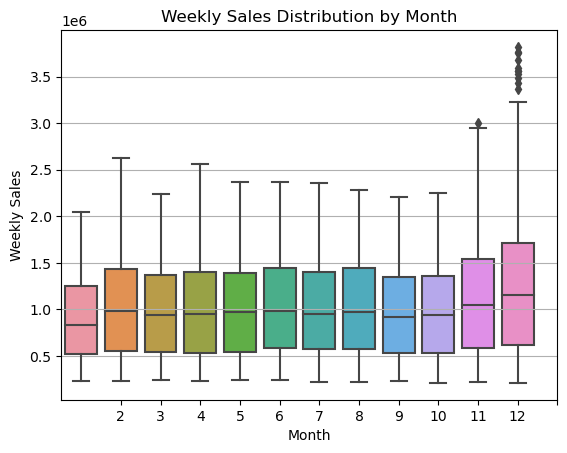

In [7]:
import seaborn as sns
# Plot box plot
sns.boxplot(x='Month', y='Weekly_Sales', data=df)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Month')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

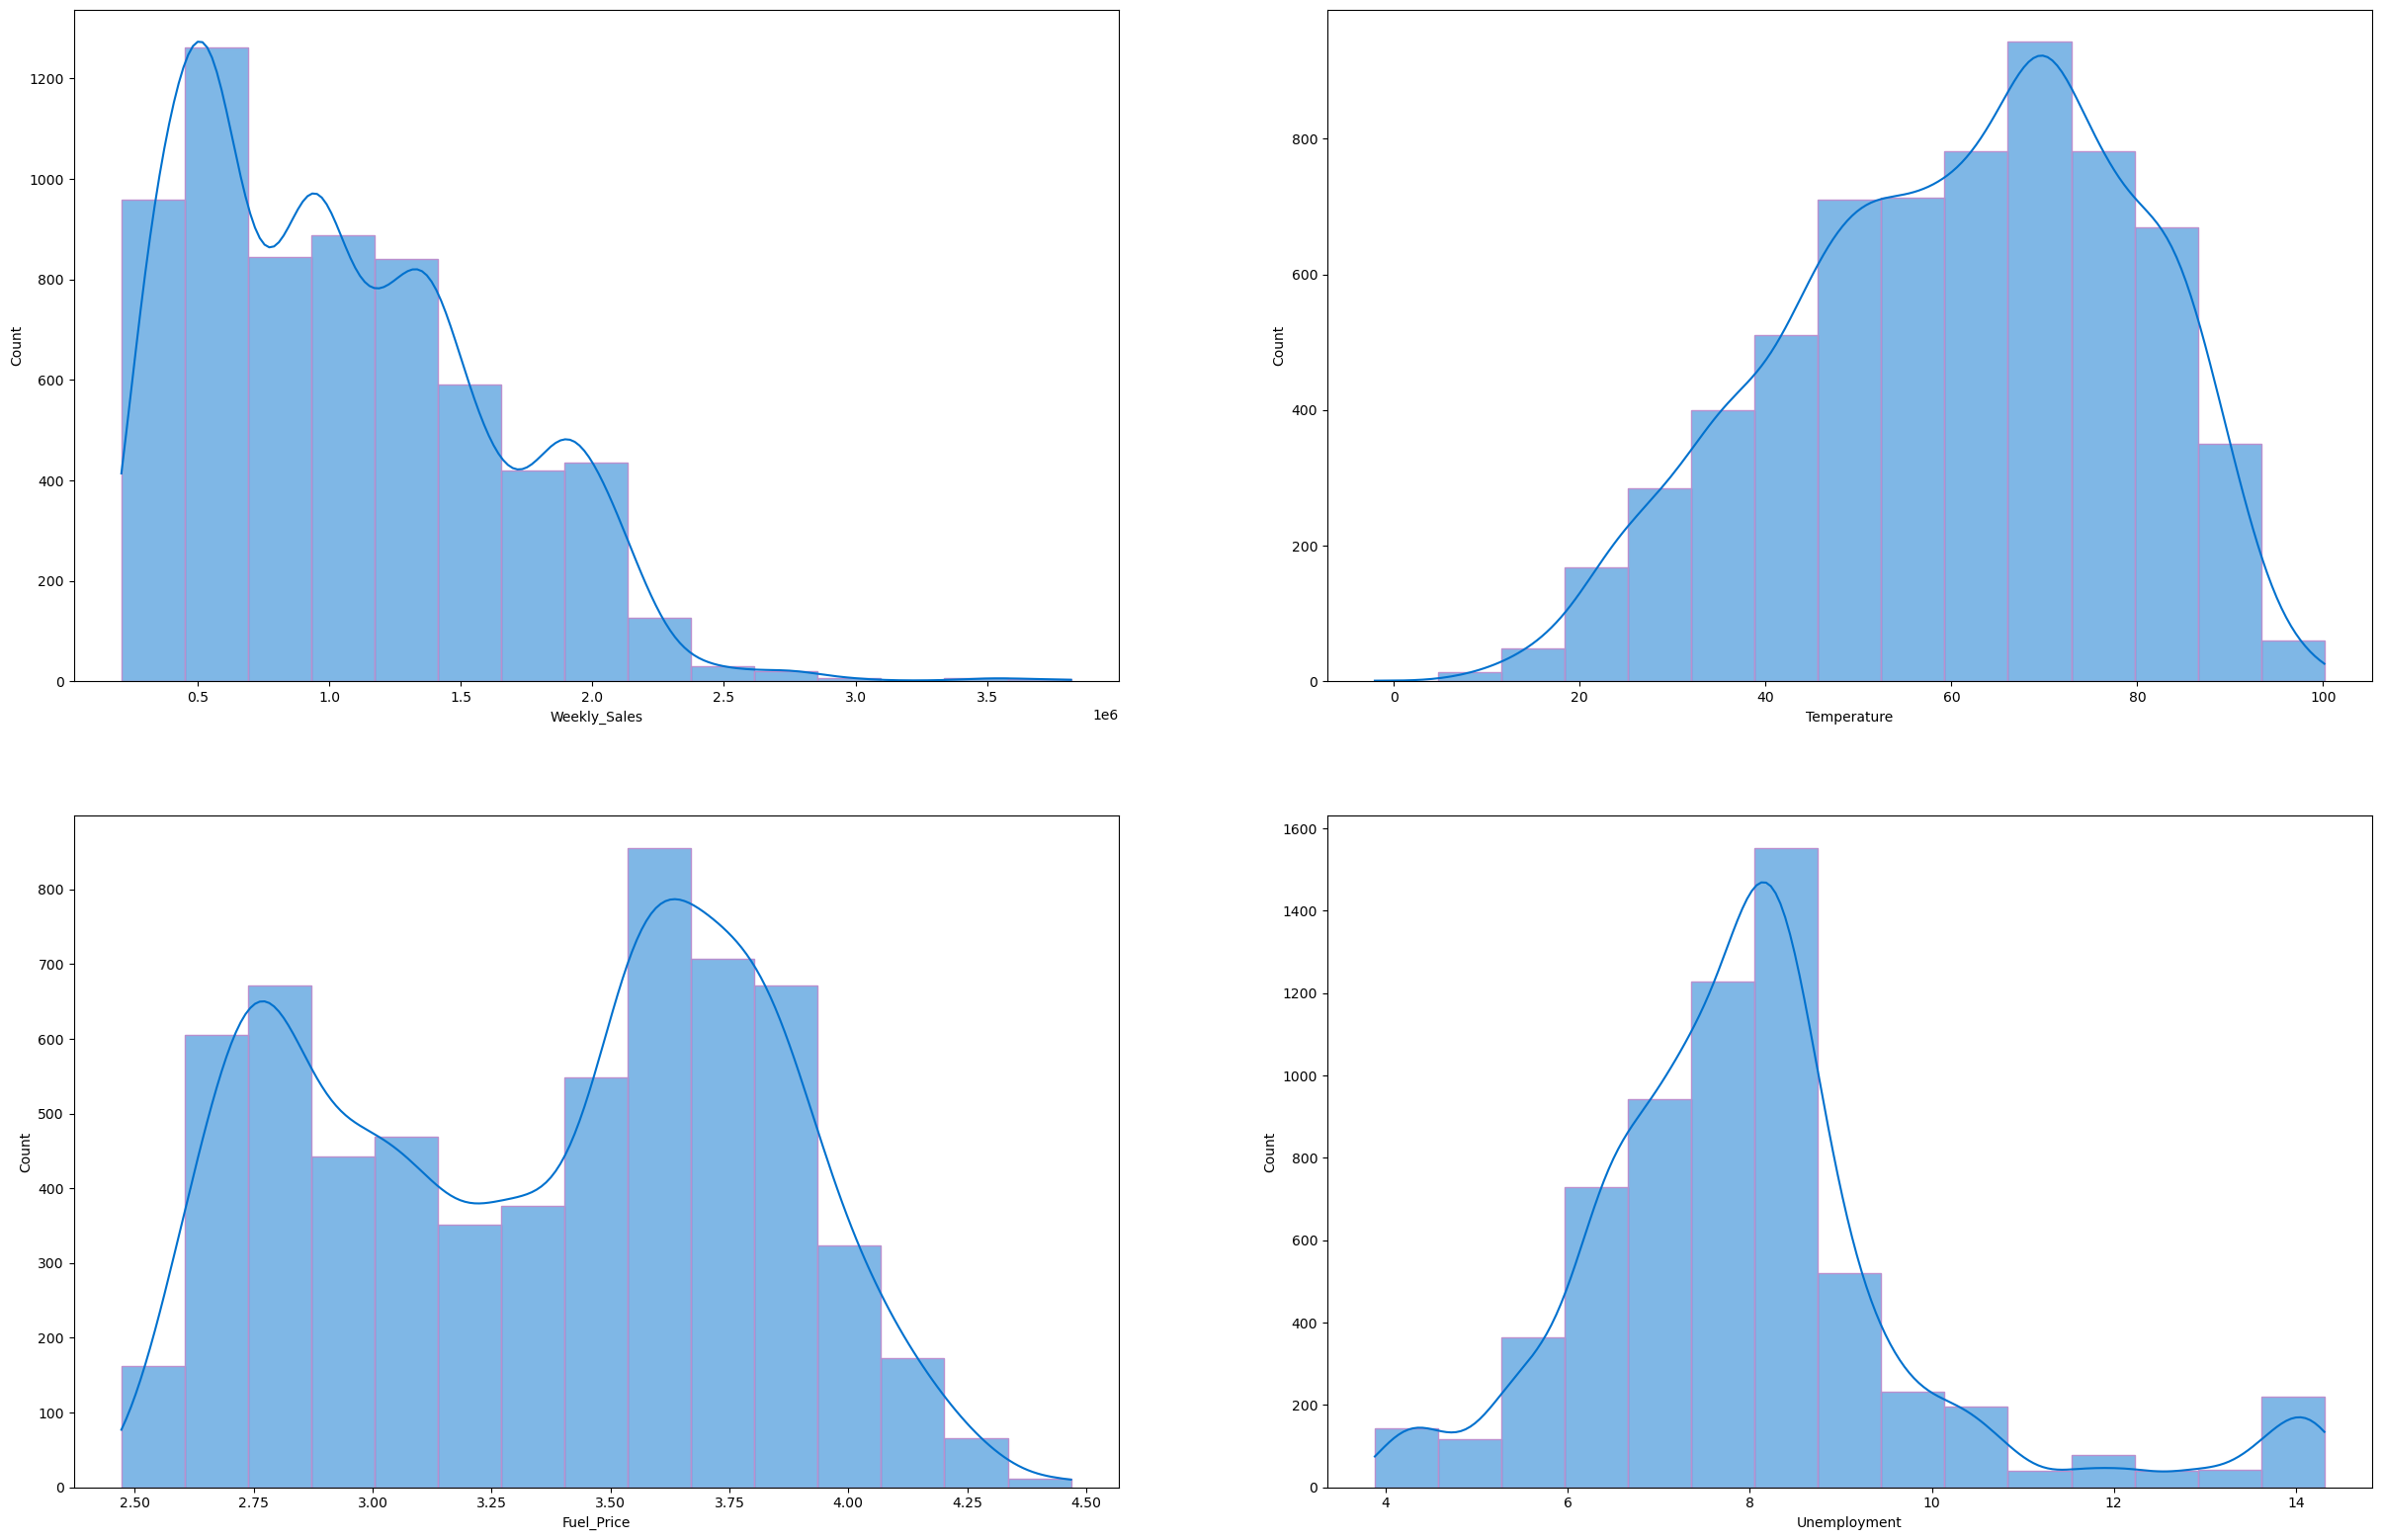

In [8]:
# Create a Histogram to show the distribution of the data for 
# Weekly Sales, "Temperature", "Fuel Price", and "Unemployment"

columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']
plt.figure(figsize=(30,30))
for i,col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = 15, color='#0071CE', edgecolor='#BB8FCE')

In [15]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
figure = px.scatter(
    data_frame=df,
    x="Weekly_Sales",
    y="Month",
    color="Year",
    size="Weekly_Sales",  # Specify the column you want to use for size
    trendline="ols"
)
figure.show()

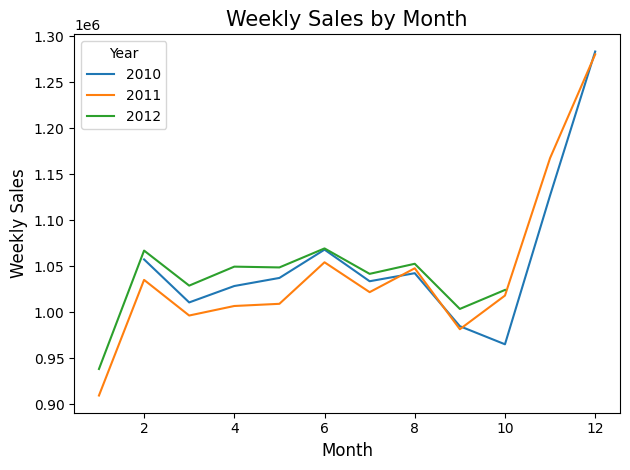

In [ ]:
#What are the highest performing months? (Weekly sales by month)

monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")

monthly_sales.plot()

plt.xlabel('Month', fontname="sans-serif", fontsize=12)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=12)
plt.title('Weekly Sales by Month', fontname="sans-serif", fontsize=15)

# plt.xticks(rotation=45, fontname="sans-serif", fontsize=30)
plt.tight_layout()
plt.show()

<Axes: xlabel='Week'>

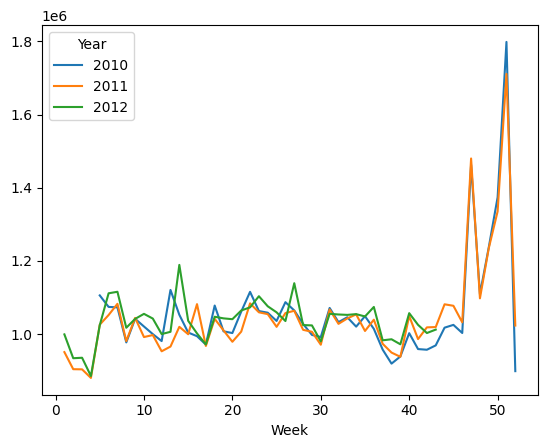

In [ ]:
#What are the highest performing weeks? (sales by weeks)
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Week")
weekly_sales.plot()

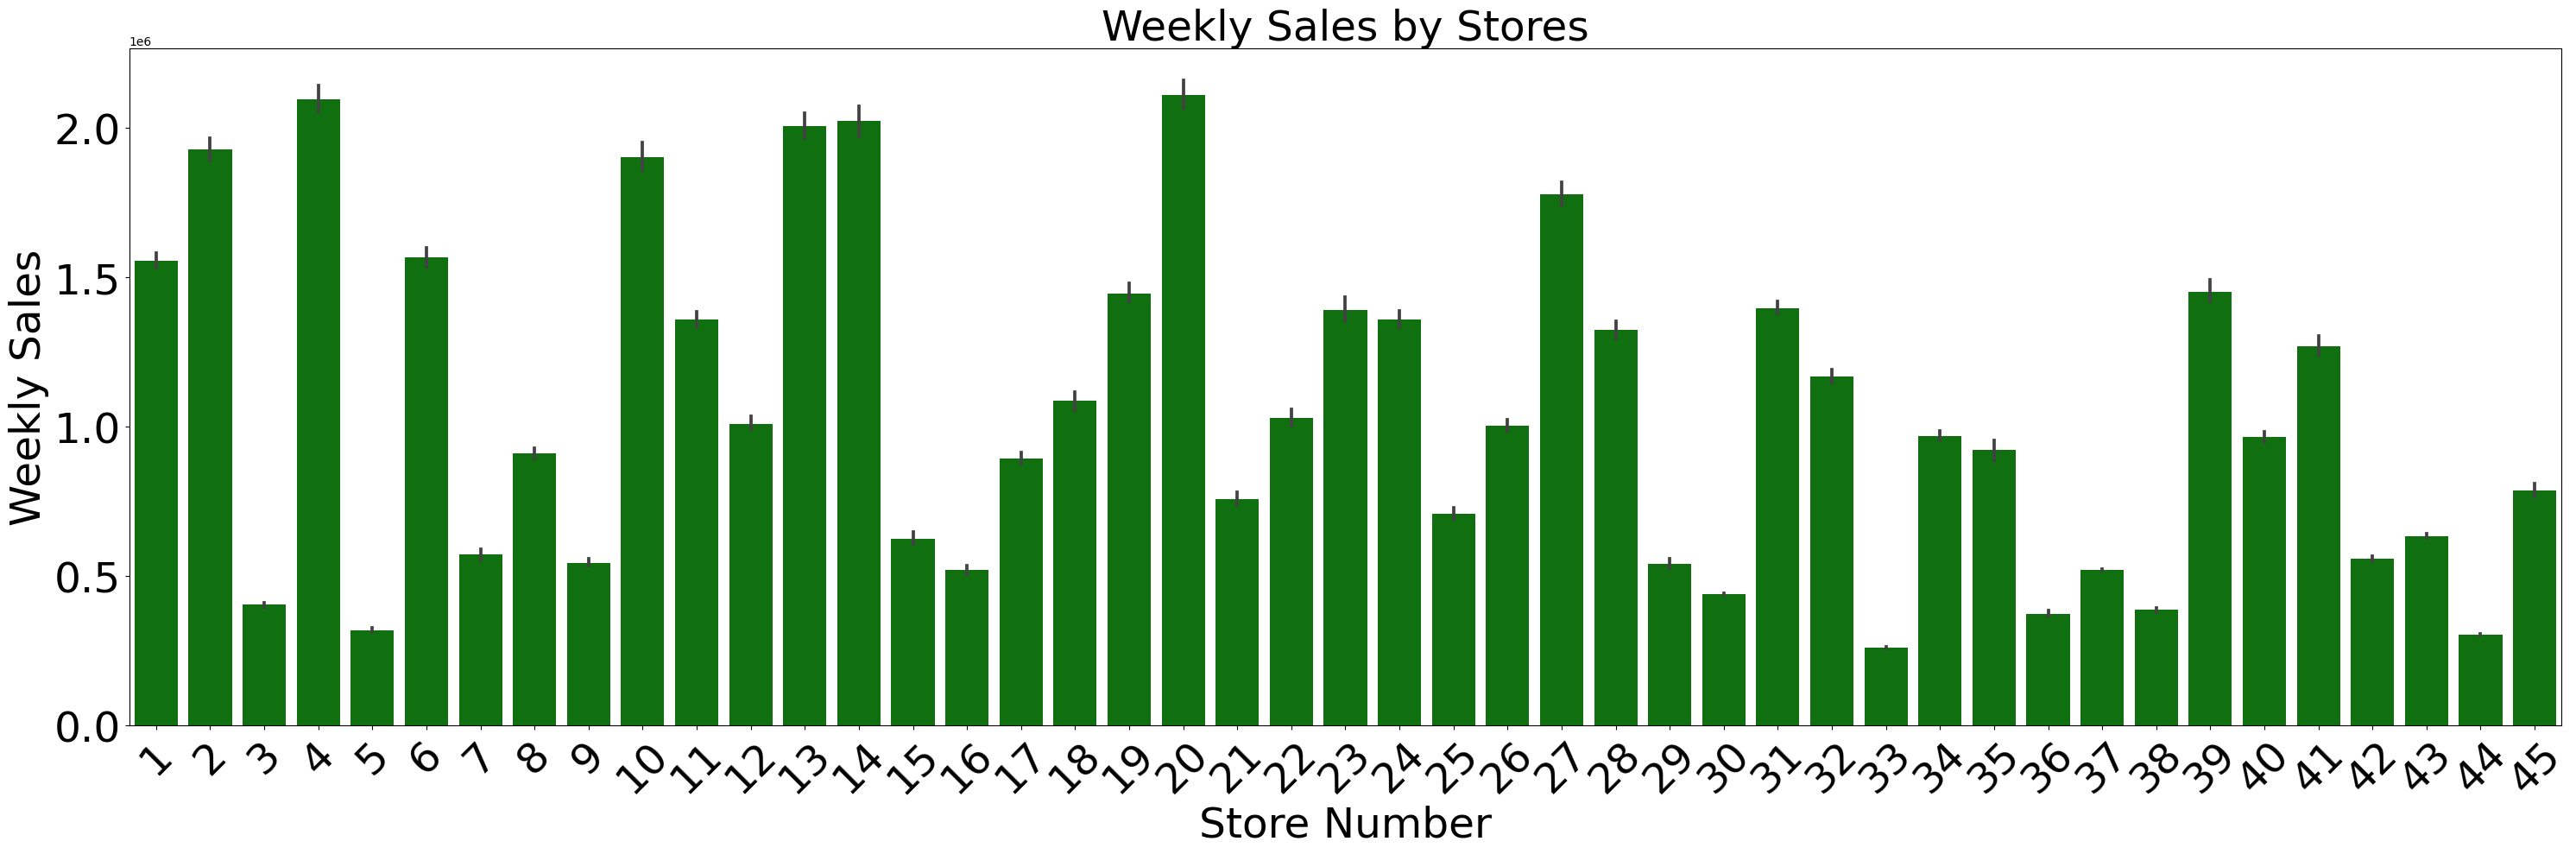

In [16]:
# Assuming df is your DataFrame containing the data
plt.figure(figsize=(30, 10))
fig = sns.barplot(x='Store', y='Weekly_Sales', color='#008000', data=df)

plt.xlabel('Store Number', fontname="sans-serif", fontsize=35)
plt.ylabel('Weekly Sales', fontname="sans-serif", fontsize=35)
plt.title('Weekly Sales by Stores', fontname="sans-serif", fontsize=35)

plt.xticks(rotation=45, fontname="sans-serif", fontsize=35)
plt.yticks(fontname="sans-serif", fontsize=35)
plt.tight_layout()
plt.show()

In [ ]:
figure = px.scatter(
    data_frame=df,
    x="Year",
    y="Weekly_Sales",
    color="Store",
    trendline="ols"
)
figure.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()

# Create an interactive time series plot of weekly sales using Plotly
fig = go.Figure()

# Add a trace for weekly sales
fig.add_trace(go.Scatter(x=weekly_sales.index, y=weekly_sales.values, mode='lines+markers', name='Weekly Sales'))

# Update layout
fig.update_layout(
    title='Time Series Plot of Weekly Sales',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    hovermode='x',
    showlegend=True
)

fig.show()

In [ ]:
# Plot scatter plot of Weekly Sales vs. Temperature

fig = px.scatter(df, x='Temperature', y='Weekly_Sales', title='Weekly Sales vs. Temperature', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Temperature', yaxis_title='Weekly Sales')

In [ ]:
# Plot scatter plot of Weekly Sales vs. Fuel Price

fig = px.scatter(df, x='Fuel_Price', y='Weekly_Sales', title='Weekly Sales vs. Fuel Price', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Fuel Price', yaxis_title='Weekly Sales')

fig.show()

In [ ]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Create an interactive line plot of Weekly Sales vs. Month using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_sales.index,
                         y=monthly_sales.values,
                         mode='lines+markers',
                         name='Weekly Sales'))

fig.update_layout(title='Weekly Sales vs. Month',
                  xaxis_title='Month',
                  yaxis_title='Average Weekly Sales',
                  xaxis=dict(tickmode='array',
                             tickvals=list(range(1, 13)),
                             ticktext=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']))

In [ ]:
# Plot scatter plot of Weekly Sales vs. Store

fig = px.scatter(df, x='Store', y='Weekly_Sales', title='Weekly Sales vs. Store', labels={'Weekly_Sales': 'Weekly Sales'})
fig.update_layout(xaxis_title='Store', yaxis_title='Weekly Sales')

In [36]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Month             12
Year               3
Week              52
dtype: int64

In [38]:
df2 = pd.get_dummies(df, dtype=int)
df2

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,42


In [59]:
y = df['Holiday_Flag']
X = df[['Weekly_Sales', 'Store', 'Unemployment',
       'Fuel_Price', 'CPI', 'Week', 'Temperature', 'Month', 'Year']]
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [60]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=9))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50


/Users/kevinsantino/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.8514 - loss: 0.4358
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.9249 - loss: 0.2615
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9282 - loss: 0.2475
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9324 - loss: 0.2303
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9310 - loss: 0.2299
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.9281 - loss: 0.2335
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9325 - loss: 0.2227
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9326 - loss: 0.2186
Epoch 9/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.9273 - loss: 0.2296
Epoch 10/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.9287 - loss: 0.2278
Epoch 11/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.9303 - loss: 0.2214
Epoch 12/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 